In [4]:
# Importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

# Print out yearly
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [5]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == "clinic 1"]
clinic_2 = yearly[yearly['clinic'] == "clinic 2"]

# Print out clinic_1
clinic_1.head()

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015


<AxesSubplot:xlabel='year', ylabel='Y Axis Label'>

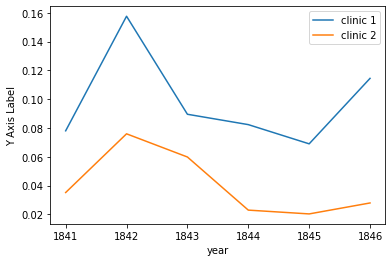

In [6]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = clinic_1.plot(x="year", y="proportion_deaths", label="clinic 1")
clinic_2.plot(x="year", y="proportion_deaths",label="clinic 2", ax=ax, ylabel="Y Axis Label")

In [7]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("datasets/monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


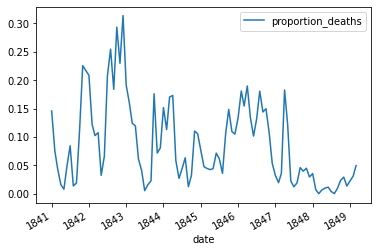

In [8]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths")

<AxesSubplot:xlabel='date', ylabel='Proportion deaths'>

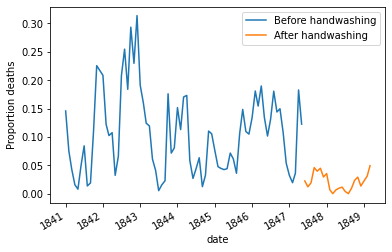

In [9]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths",
                         label="Before handwashing")
after_washing.plot(x="date", y="proportion_deaths",
                   label="After handwashing", ax=ax, ylabel="Proportion deaths")

In [10]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion - before_proportion
mean_diff

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
93   NaN
94   NaN
95   NaN
96   NaN
97   NaN
Name: proportion_deaths, Length: 98, dtype: float64

In [11]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace = True)
    boot_after = after_proportion.sample(frac=1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean()) 

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101574
0.975   -0.067454
dtype: float64

In [12]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True